# Project : Loan Prediction

#Let's Say, You are the owner of the Housing Finance Company and you want to build your own model to predict the customers are applying for the home loan and company want to check and validate the customer are eligible for the home loan.

#The Problem is

#In a Simple Term, Company wants to make automate the Loan Eligibility Process in a real time scenario related to customer's detail provided while applying application for home loan forms.

# Steps are :
A.Gathering Data

B.Exploratory Data Analysis

C.Data Visualizations


D.Machine Learning Model Decision.


E.Traing the ML Model

F.Predict Model

# Import Modules

In [1]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


# A. Gathering Data


In [2]:
#Show the Dataset Path to get dataset

loan_train =pd.read_csv(r'D:\BIA\SD_Load Prediction/loan-train.csv')
loan_test = pd.read_csv(r'D:\BIA\SD_Load Prediction/loan-test.csv')

Lets display the some few information from our large datasets

Here, We shows the first five rows from datasets

In [3]:
loan_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


As we can see in the above output, there are too many columns, ( columns known as features as well. )

We can also use loan_train to show few rows from the first five and last five record from the dataset

In [4]:
loan_train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [5]:
loan_train.shape

(614, 13)

#After we collecting the data, Next step we need to understand what kind of data we have

#Also we can get the column as an list(array) from dataset

#Note: DataFrame.columns returns the total columns of the dataset, Store the number of columns in variable loan_train_columns

In [6]:
print("Number of Row",loan_train.shape[0])
print("Number of Columns",loan_train.shape[1])

Number of Row 614
Number of Columns 13


In [7]:
loan_train_columns = loan_train.columns # assign to a variable
loan_train_columns # print the list of columns


Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

Now, Understanding the Data

1) First of all we use the loan_train.describe() method to shows the important information from the dataset

2) It provides the count, mean, standard deviation (std), min, quartiles and max in its output.

In [8]:
loan_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


As I said the above cell, this the information of all the methamatical details from dataset. Like count, mean, standard deviation (std), min, quartiles(25%, 50%, 75%) and max

#Another method is info(), This method show us the information about the dataset, Like

What's the type of culumn have?

How many rows available in the dataset?

What are the features are there?

How many null values available in the dataset? Ans so on..

In [9]:
pd.crosstab(loan_train['Credit_History'],loan_train['Loan_Status'],margins=True)

Loan_Status,N,Y,All
Credit_History,,,
0.0,82,7,89
1.0,97,378,475
All,179,385,564


In [10]:
loan_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


As we can see in the output.

1) There are 614 entries

There are total 13 features (0 to 12)

There are three types of datatype dtypes: float64(4), int64(1), object(8)
    
It's Memory usage that is, memory usage: 62.5+ KB

Also, We can check how many missing values available in the Non-Null Count column


# B.Exploratory Data Analysis

In [11]:
loan_train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [12]:
loan_train.isnull().sum()*100/len(loan_train)

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [13]:
loan_train =  loan_train.drop('Loan_ID',axis=1)

In [14]:
loan_train.head(1)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y


In [15]:
columns = ['Gender','Dependents','LoanAmount','Loan_Amount_Term']

In [16]:
loan_train = loan_train.dropna(subset=columns)

In [17]:
loan_train.isnull().sum()*100/len(loan_train)

Gender               0.000000
Married              0.000000
Dependents           0.000000
Education            0.000000
Self_Employed        5.424955
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           0.000000
Loan_Amount_Term     0.000000
Credit_History       8.679928
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [18]:
loan_train['Self_Employed'].mode()

0    No
Name: Self_Employed, dtype: object

In [19]:
loan_train['Self_Employed'].mode()[0]

'No'

In [20]:
loan_train['Self_Employed'] = loan_train['Self_Employed'].fillna(loan_train['Self_Employed'].mode()[0])

In [21]:
loan_train.isnull().sum()*100/len(loan_train)

Gender               0.000000
Married              0.000000
Dependents           0.000000
Education            0.000000
Self_Employed        0.000000
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           0.000000
Loan_Amount_Term     0.000000
Credit_History       8.679928
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [22]:
loan_train['Credit_History'] = loan_train['Credit_History'].fillna(loan_train['Credit_History'].mode()[0])

In [23]:
loan_train.isnull().sum()*100/len(loan_train)

Gender               0.0
Married              0.0
Dependents           0.0
Education            0.0
Self_Employed        0.0
ApplicantIncome      0.0
CoapplicantIncome    0.0
LoanAmount           0.0
Loan_Amount_Term     0.0
Credit_History       0.0
Property_Area        0.0
Loan_Status          0.0
dtype: float64

In [24]:
loan_train['Credit_History'].unique()

array([1., 0.])

In [25]:
loan_train['Self_Employed'].unique()

array(['No', 'Yes'], dtype=object)

In [26]:
loan_train['Credit_History'].mode()[0]

1.0

In [27]:
loan_train['Credit_History'] = loan_train['Credit_History'].fillna(loan_train['Credit_History'].mode()[0])

In [28]:
loan_train.isnull().sum()*100/len(loan_train)

Gender               0.0
Married              0.0
Dependents           0.0
Education            0.0
Self_Employed        0.0
ApplicantIncome      0.0
CoapplicantIncome    0.0
LoanAmount           0.0
Loan_Amount_Term     0.0
Credit_History       0.0
Property_Area        0.0
Loan_Status          0.0
dtype: float64

In [29]:
loan_train.sample(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
583,Male,Yes,1,Graduate,No,1880,0.0,61.0,360.0,1.0,Rural,N
128,Male,Yes,1,Graduate,Yes,10513,3850.0,160.0,180.0,0.0,Urban,N
581,Male,No,0,Graduate,No,1836,33837.0,90.0,360.0,1.0,Urban,N
273,Male,Yes,0,Graduate,No,2620,2223.0,150.0,360.0,1.0,Semiurban,Y
8,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y


In [30]:
loan_train['Dependents'] = loan_train['Dependents'].replace(to_replace="3+",value='4')

In [31]:
loan_train['Dependents'].unique()

array(['1', '0', '2', '4'], dtype=object)

In [32]:
loan_train['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [33]:
loan_train['Gender']=loan_train['Gender'].map({'Male':1,'Female':0}).astype('int')
loan_train['Married']=loan_train['Married'].map({'Yes':1,'No':0}).astype('int')
loan_train['Education']=loan_train['Education'].map({'Graduate':1,'Not Graduate':0}).astype('int')
loan_train['Self_Employed']=loan_train['Self_Employed'].map({'Yes':1,'No':0}).astype('int')
loan_train['Property_Area']=loan_train['Property_Area'].map({'Rural':0,'Semiurban':2,'Urban':1}).astype('int')
loan_train['Loan_Status']=loan_train['Loan_Status'].map({'Y':1,'N':0}).astype('int')

In [34]:
loan_train['Property_Area'].unique()

array([0, 1, 2])

In [35]:
loan_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,1
5,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,1,1


In [36]:
X = loan_train.drop('Loan_Status',axis=1)

In [37]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1
5,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,0
610,1,1,4,1,0,4106,0.0,40.0,180.0,1.0,0
611,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,1
612,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,1


In [38]:
y = loan_train['Loan_Status']

In [39]:
y

1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 553, dtype: int32

In [40]:
#Features Scalling

In [41]:
loan_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,1
5,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,1,1


In [42]:
cols = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']

In [43]:
from sklearn.preprocessing import StandardScaler
st = StandardScaler()
X[cols]=st.fit_transform(X[cols])

In [44]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,1,1,1,1,0,-0.128694,-0.049699,-0.214368,0.279961,1.0,0
2,1,1,0,1,1,-0.394296,-0.545638,-0.952675,0.279961,1.0,1
3,1,1,0,0,0,-0.464262,0.229842,-0.309634,0.279961,1.0,1
4,1,0,0,1,0,0.109057,-0.545638,-0.059562,0.279961,1.0,1
5,1,1,2,1,1,0.011239,0.834309,1.440866,0.279961,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,-0.411075,-0.545638,-0.893134,0.279961,1.0,0
610,1,1,4,1,0,-0.208727,-0.545638,-1.262287,-2.468292,1.0,0
611,1,1,1,1,0,0.456706,-0.466709,1.274152,0.279961,1.0,1
612,1,1,2,1,0,0.374659,-0.545638,0.488213,0.279961,1.0,1


# C.Data Visualizations

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline


import seaborn as sns



sns.set_style('dark')

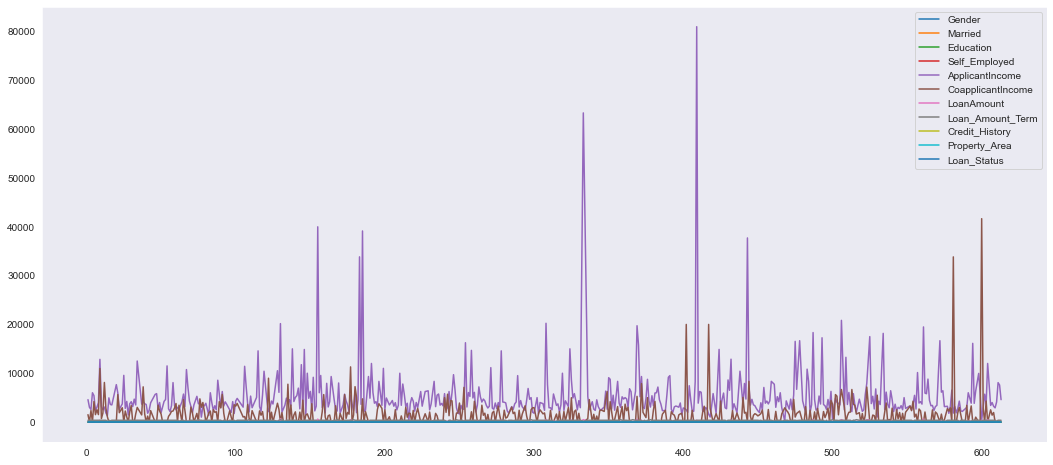

In [46]:
loan_train.plot(figsize=(18, 8))

plt.show()

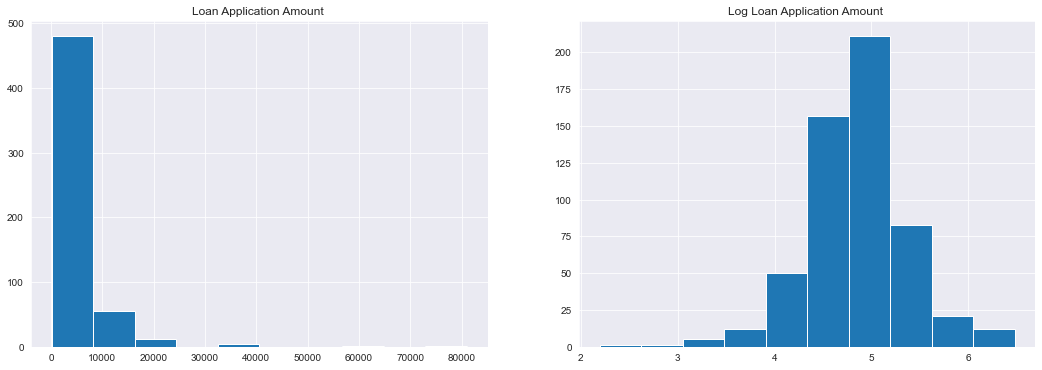

In [47]:
plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)


loan_train['ApplicantIncome'].hist(bins=10)
plt.title("Loan Application Amount ")
X

plt.subplot(1, 2, 2)
plt.grid()
plt.hist(np.log(loan_train['LoanAmount']))
plt.title("Log Loan Application Amount ")

plt.show()

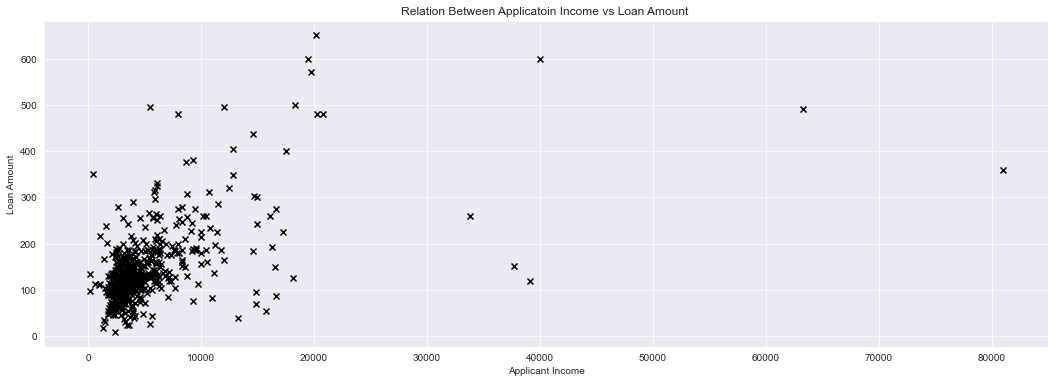

In [48]:
plt.figure(figsize=(18, 6))
plt.title("Relation Between Applicatoin Income vs Loan Amount ")

plt.grid()
plt.scatter(loan_train['ApplicantIncome'] , loan_train['LoanAmount'], c='k', marker='x')
plt.xlabel("Applicant Income")
plt.ylabel("Loan Amount")
plt.show()

In [49]:
#Here we can see that apllicanat who have income lesser that 10000 take frequent loans of 100 to 200 dollars

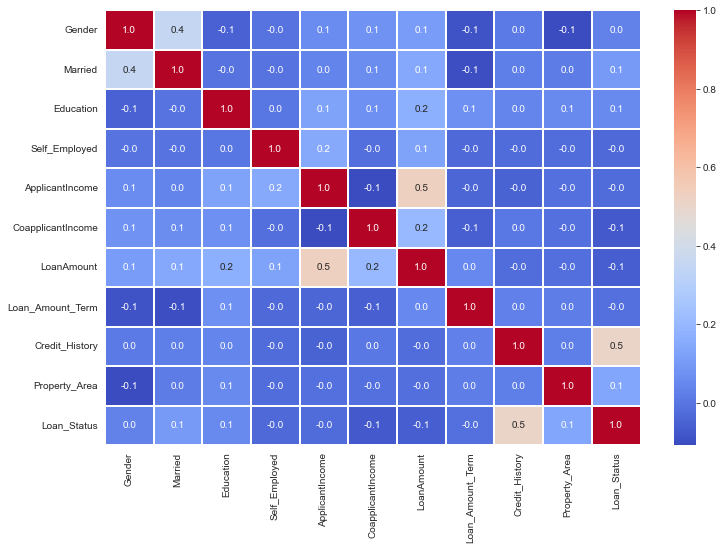

In [50]:
plt.figure(figsize=(12,8))
sns.heatmap(loan_train.corr(), cmap='coolwarm', annot=True, fmt='.1f', linewidths=.1)
plt.show()

In [51]:
#In this heatmap, we can clearly seen that loan status is highly correlated with credit history

# D.Machine Learning Model Decision.

In [52]:
#splitting the dataset into the Traning Set and test set  & applying  K -fold cross Validation

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
import numpy as np

In [54]:
model_df={}
def model_val(model,X,y):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    print(f"{model}accuracy is {accuracy_score(y_test,y_pred)}")
    
    score = cross_val_score(model,X,y,cv=5)
    print(f"{model}Avg cross val  score is {np.mean(score)}")
    model_df[model]=round(np.mean(score)*100,2)

In [140]:
model_df


{LogisticRegression(): 80.48,
 SVC(): 79.39,
 DecisionTreeClassifier(): 71.98,
 RandomForestClassifier(): 78.12,
 GradientBoostingClassifier(): 76.86}

# E.Training the Machine Learning Model


In [56]:
#logistic Regression

In [57]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model_val(model,X,y)

LogisticRegression()accuracy is 0.8018018018018018
LogisticRegression()Avg cross val  score is 0.8047829647829647


In [58]:
#SVC

In [59]:
from sklearn import svm
model = svm.SVC()
model_val(model,X,y)

SVC()accuracy is 0.7927927927927928
SVC()Avg cross val  score is 0.7938902538902539


In [60]:
#Decision Tree Classifier

In [61]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model_val(model,X,y)

DecisionTreeClassifier()accuracy is 0.7387387387387387
DecisionTreeClassifier()Avg cross val  score is 0.7198198198198199


In [62]:
#Random forest Classifier

In [63]:
from sklearn.ensemble import RandomForestClassifier
model =RandomForestClassifier()
model_val(model,X,y)

RandomForestClassifier()accuracy is 0.7747747747747747
RandomForestClassifier()Avg cross val  score is 0.7812285012285012


In [64]:
#Gradient Boosting  Classifier

In [65]:
from sklearn.ensemble  import  GradientBoostingClassifier
model =  GradientBoostingClassifier()
model_val(model,X,y)

GradientBoostingClassifier()accuracy is 0.7927927927927928
GradientBoostingClassifier()Avg cross val  score is 0.7685503685503685


# Hyperparameter Tuning

In [66]:
from sklearn.model_selection import RandomizedSearchCV

In [67]:
#Logistic Regression

In [68]:
log_reg_grid={"C":np.logspace(-4,4,20),
              "solver":['liblinear']}

In [69]:
rs_log_reg=RandomizedSearchCV(LogisticRegression(),
                              param_distributions=log_reg_grid,
                              n_iter=20,cv=5,
                              verbose=True)

In [70]:
rs_log_reg.fit(X,y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [71]:
 rs_log_reg.best_score_

0.8047829647829647

In [72]:
svc_grid = {'C':[0.25,0.50,0.75,1],"kernel":["linear"]}

In [73]:
rs_svc=RandomizedSearchCV(svm.SVC(),
                          param_distributions=svc_grid,
                          cv=5,
                          n_iter=20,
                          verbose=True)

In [74]:
rs_svc.fit(X,y)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 4 is smaller than n_iter=20. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=SVC(), n_iter=20,
                   param_distributions={'C': [0.25, 0.5, 0.75, 1],
                                        'kernel': ['linear']},
                   verbose=True)

In [75]:
rs_svc.best_score_

0.8066011466011467

In [76]:
#Random Forest  Classifier
from sklearn.model_selection import RandomizedSearchCV 
from sklearn.ensemble import RandomForestClassifier

In [77]:
RandomForestClassifier()

RandomForestClassifier()

In [78]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
print(rfc.get_params().keys())

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])


In [79]:
rf_grid={'n_estimators':np.arange(10,1000,10),
         'max_features':['auto','sqrt'],
         'max_depth':[None,3,5,10,20,30],
         'min_samples_split':[2,5,20,50,100],
         'min_samples_leaf':[1,2,5,10],
         
 }

In [80]:
rs_rf=RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions=rf_grid,
                          cv=5,
                          n_iter=20,
                          verbose=True)

In [81]:
rs_rf.fit(X,y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 20, 50,
                                                              100],
                                        'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260,
       270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390,
       400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510, 520,
       530, 540, 550, 560, 570, 580, 590, 600, 610, 620, 630, 640, 650,
       660, 670, 680, 690, 700, 710, 720, 730, 740, 750, 760, 770, 780,
       790, 800, 810, 820, 830, 840, 850, 860, 870, 880, 890, 900, 9

In [82]:
rs_rf.best_score_

0.8066011466011467

In [83]:
rs_rf.best_params_

{'n_estimators': 260,
 'min_samples_split': 2,
 'min_samples_leaf': 10,
 'max_features': 'auto',
 'max_depth': 5}

LogisticRegression score before Hyperparamter Tuning 80.48

LogisticRegression score after  Hyperparamter Tuning 80.48

SVC score before Hyperparamter Tuning 79.39

SVC score after Hyperparamter Tuning 80.66

RandomForestClassifier before Hyperparamter Tuning  78.85

RandomForestClassifier after Hyperparamter Tuning  80.66




# F.Predict Model

In [84]:
#Save the Model

In [85]:
X = loan_train.drop('Loan_Status', axis=1)
y = loan_train['Loan_Status']

In [86]:
rf = RandomForestClassifier(n_estimators=270,
min_samples_split=5,
min_samples_leaf=5,
max_features='sqrt',
max_depth=5)

In [87]:
rf.fit(X,y)

RandomForestClassifier(max_depth=5, max_features='sqrt', min_samples_leaf=5,
                       min_samples_split=5, n_estimators=270)

In [88]:
import joblib

In [89]:
joblib.dump(rf,'loan_status_predict')

['loan_status_predict']

In [90]:
model = joblib.load('loan_status_predict')

In [136]:
import pandas as pd
loan_train = pd.DataFrame({
    'Gender':1,
    'Married':1,
    'Dependents':2,
    'Education':0,
    'Self_Employed':0,
    'ApplicantIncome':2889,
    'CoapplicantIncome':0.0,
    'LoanAmount':45,
    'Loan_Amount_Term':180,
    'Credit_History':0,
    'Property_Area':1
    
},index=[0])

In [137]:
loan_train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,2,0,0,2889,0.0,45,180,0,1


In [138]:
result = model.predict(loan_train)

In [139]:
if result == 1:
    print("Loan Approved")
else:
    print("Loan Not Approved")

Loan Not Approved
